# Image Selection and Segmentation with Morphological Operations

In this notebook, we demonstrate **image selection** techniques to separate objects (coins or balloons) from their background using **OpenCV**.  
We used different methods depending on the image type:

- **Coins** → grayscale + threshold + morphological ops (dilation, erosion, closing)  
- **Balloons** → HSV color filtering + closing  

---

## 1. Coin Images

For **coins**, the pipeline was:

1. Convert to **grayscale**  
2. Apply **Otsu’s threshold (binary inversion)** → coins become white, background black  
3. Apply **morphological operations**:
   - **Dilation + erosion** (5×5 ellipse kernel) → best for coins that are close but not touching
   - **Closing (3×3 square kernel)** → best for coins with holes or gaps

### Morphological Kernels

- **3×3 Square kernel**

\[
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
\]

- **5×5 Ellipse kernel**

\[
\begin{bmatrix}
0 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 1 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 & 0
\end{bmatrix}
\]

---

## 2. Balloon Images

For **balloons**, grayscale failed because bright colors (yellow, pink) lost intensity information and caused **black holes inside the objects**.  

Instead, we used **HSV color filtering**:

1. Convert image to **HSV**  
2. Keep only pixels with **enough saturation and brightness** (colored regions)  
3. Apply **morphological closing (3×3 square kernel)** to fill small black gaps inside balloons  

This approach worked better since balloons are defined by strong colors.  

---

## 3. Why Different Methods?

- **Coins**: They differ from the background mainly by **intensity**, so grayscale thresholding works well.  
- **Balloons**: They differ by **color**, so HSV-based segmentation is more robust.  

Using **one method for all images** gave poor results, so we optimized per image type.

---

## 4. Conclusion

- **Coins**: grayscale + threshold + morphology is effective.  
- **Balloons**: HSV + morphology works better.  
- **Morphological kernels** must be chosen carefully:
  - 5×5 ellipse → preserves round coins while separating them  
  - 3×3 square → fills small gaps inside balloons  

👉 The most optimal pipeline comes from **selecting different methods for different images**.  


## Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Image Selection with Morphological Operations

## Balloon Image Selection (HSV + Closing)

For balloons, grayscale thresholding produced **holes inside the objects** (especially in bright yellow and pink regions).  
To fix this, we switched to **HSV color space**, which separates color (Hue) from intensity (Value).  

### Steps:
1. **Convert to HSV**  
   - Hue → color type  
   - Saturation → color intensity  
   - Value → brightness  

2. **Apply color threshold**  
   - Keep pixels with saturation and brightness above a threshold  
   - This selects **colored objects** (balloons) and ignores background  

3. **Morphological Closing**  
   - Kernel: **3×3 Square**  
   - Operation: Dilation followed by erosion  
   - Purpose: Fill small black gaps/holes inside the balloons  

### 5. Expected Result
- Left: Original grayscale coin image  
- Right: Processed binary mask with coins clearly separated from the background

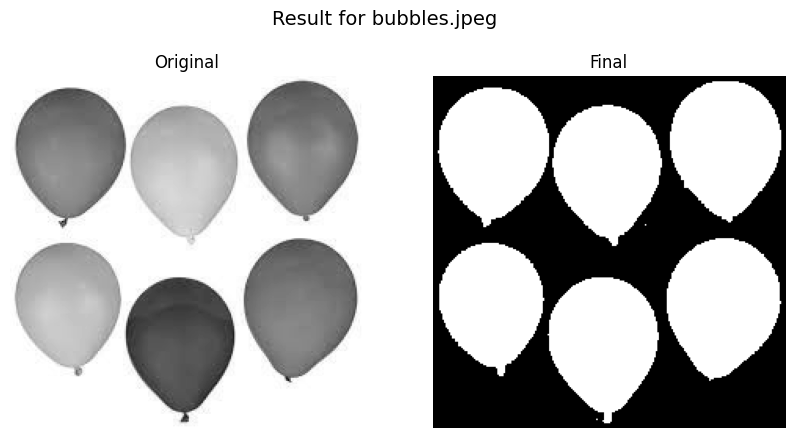

In [4]:
def show_side_by_side(title, img1, img2, label1="Original", label2="Final"):
    """showing result side by side to show the differences between original grayscaled image and the final result"""
    
    plt.figure(figsize=(10,5))
    # Left: original
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap="gray")
    plt.title(label1)
    plt.axis("off")

    # Right: processed
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap="gray")
    plt.title(label2)
    plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

def process_balloon(img_path):
    """Processing "assets/bubbles.jpeg" by using HSV methode to keeping only pixels with enough saturation"""
    
    image = cv2.imread(img_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Keep only pixels with enough saturation (colored regions)
    lower = np.array([0, 40, 40])   
    upper = np.array([180, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)

    # Apply morphological closing to fill gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)

    return image, mask_closed

# Example run
img_path = "assets/bubbles.jpeg"
orig, final_mask = process_balloon(img_path)

# Convert original to grayscale for consistency with show_side_by_side
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)

# Show only original vs final (like coins)
show_side_by_side(f"Result for {os.path.basename(img_path)}", gray, final_mask)

## Coin Image Processing with Morphological Operations

This section demonstrates how to process a coin image to separate the coins (foreground objects) from the background using **thresholding** and **morphological operations**.

---

### 1. Helper Function – Visualization
We define a function to display the **original image** alongside the **processed result**.


### 2. Input Image
We use a single image of coins stored in the assets folder.


### 3. Processing Steps
The pipeline includes the following steps:
- **Grayscale Conversion**  
  Simplifies the image by removing color information.
- **Binary Thresholding (Otsu’s method)**  
  Coins become white  
  Background becomes black
- **Morphological Operations (Erosion)**  
  Refines the mask by shrinking objects slightly and reducing noise.

### 4. Define Kernel
We use a 2×2 elliptical kernel for morphological processing.

### 5. Expected Result
- Left: Original grayscale coin image  
- Right: Processed binary mask with coins clearly separated from the background


Processing assets/coins1.jpeg ...


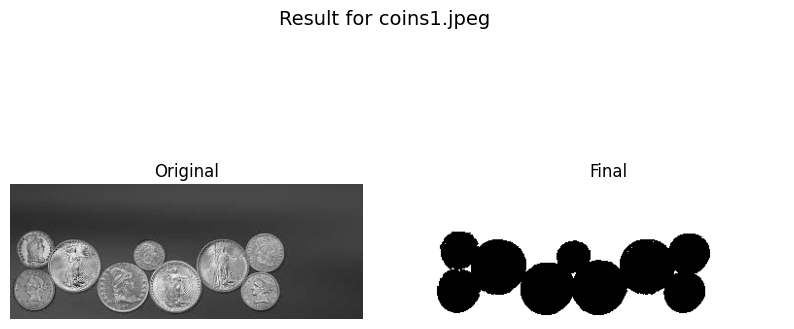

In [7]:
def show_side_by_side(title, img1, img2, label1="Original", label2="Final"):
    """showing result side by side to show the differences between original grayscaled image and the final result"""
    
    plt.figure(figsize=(10,5))
    # Left: original
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap="gray")
    plt.title(label1)
    plt.axis("off")

    # Right: processed
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap="gray")
    plt.title(label2)
    plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

images = [
    "assets/coins1.jpeg",
]

# Use 3x3 ellipse kernel for closing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))

for img_path in images:
    print(f"\nProcessing {img_path} ...")

    image = cv2.imread(img_path)
    if image is None:
        print(f"⚠️ Could not load {img_path}")
        continue
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Binary inversion (coins white, bg black)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 2: Morphological selection (closing 3x3)
    final_mask = cv2.morphologyEx(binary, cv2.MORPH_ERODE, kernel, iterations=3)

    # Show only original vs final
    show_side_by_side(f"Result for {os.path.basename(img_path)}", gray, final_mask)


## Coin Image Processing with Dilation + Erosion
In this section, we process multiple coin images (`coins2.jpeg`, `coins3.jpeg`, `coins4.jpeg`) to separate the coins from the background.  
The main idea is to use **binary thresholding** and **morphological operations**.

---

### 1. Helper Function – Visualization
We use the same function `show_side_by_side()` to compare the **original grayscale image** and the **processed binary mask**.


### 2. Input Images
We process three different coin images stored in the assets folder.


### 3. Define Kernel
We use a 5×5 elliptical kernel.  
This shape better preserves the round structure of the coins compared to a rectangular kernel.


### 4. Processing Pipeline
The steps are as follows:

- **Convert to Grayscale** – simplifies processing by removing color.  
- **Binary Thresholding (Otsu’s method)**  
  Coins → White  
  Background → Black  
- **Morphological Dilation**  
  Expands white regions, useful for separating coins that are close together.  
- **Morphological Erosion**  
  Shrinks white regions slightly to restore original coin size.  
- **Final Mask** – clean binary image with coins separated.


### 5. Expected Result
- Left: Original grayscale coin image  
- Right: Processed binary mask with coins clearly separated from the background



Processing assets/coins2.jpeg ...


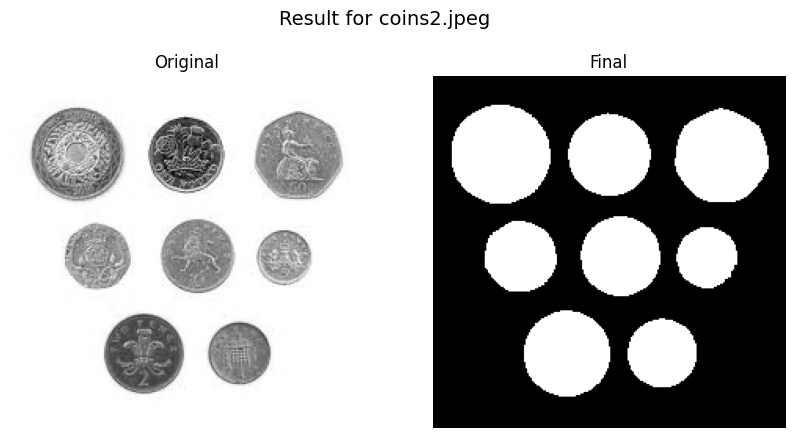


Processing assets/coins3.jpeg ...


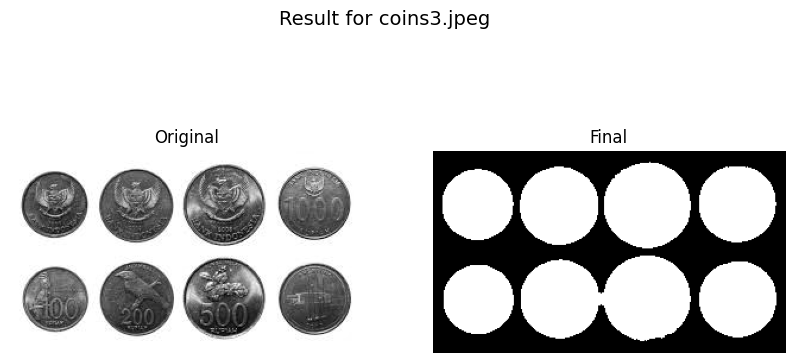


Processing assets/coins4.jpeg ...


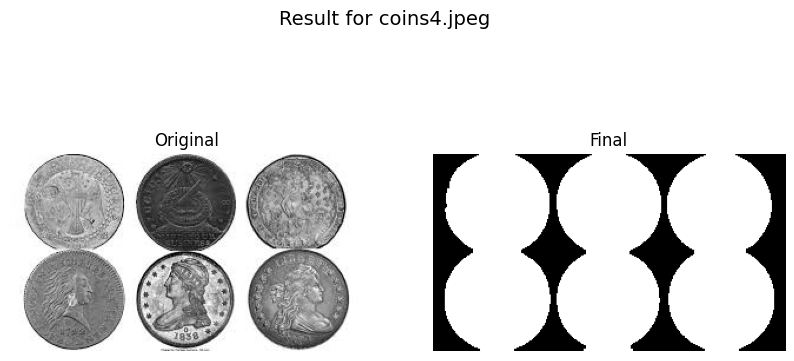

In [4]:
def show_side_by_side(title, img1, img2, label1="Original", label2="Final"):
    """showing result side by side to show the differences between original grayscaled image and the final result"""
    
    plt.figure(figsize=(10,5))
    # Left: original
    plt.subplot(1,2,1)
    plt.imshow(img1, cmap="gray")
    plt.title(label1)
    plt.axis("off")

    # Right: processed
    plt.subplot(1,2,2)
    plt.imshow(img2, cmap="gray")
    plt.title(label2)
    plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

images = [
    "assets/coins2.jpeg",
    "assets/coins3.jpeg",
    "assets/coins4.jpeg"
]

# Use 5x5 ellipse kernel (stronger shape preservation)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

for img_path in images:
    print(f"\nProcessing {img_path} ...")

    image = cv2.imread(img_path)
    if image is None:
        print(f"⚠️ Could not load {img_path}")
        continue
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Binary inversion (coins white, bg black)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 2: Morphological selection (dilation + erosion)
    dilated = cv2.dilate(binary, kernel, iterations=2)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Final mask (white coins, black bg)
    final_mask = eroded  

    # Show only original vs final
    show_side_by_side(f"Result for {os.path.basename(img_path)}", gray, final_mask)
